# Цель работы:
* Обучить модель "дерево решений" и проверить её точность

### необходимо импортировать pandas

In [145]:
import pandas as pd

### далее в переменную data записывается датасет

In [ ]:
data = pd.read_csv('./piracydataset.csv')

### далее значения столбаца version изменяем на бинарные значения

In [ ]:
data['version'] = data['version'].apply(lambda x: 1 if x == 'Paid Version' else 0)

### Далее импортируется  класс LabelEncoder из модуля sklearn.preprocessing  для преобразования категориальных данных в числовые. <br> </br> Далее для каждого столбца в data, содежащий строковые даныне применяется LabelEncoder для преобразования строковых значений в числовые

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Преобразование строковых значений в числовые
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

### Далее импортируем train-test-split, которая  используется для разделения данных на обучающую и тестовую выборки <br> <br> Далее разделяем признакми на x (Все столбцы, кроме version) и y  (сам version) <br> <br> Далее разделяем данные на обучающую и тестовые выборки: 70% данных используется для обучения, 30% - для тестирования. <code>random_state = 42</code> - обеспечивает воспроизводимость результатов

In [137]:
from sklearn.model_selection import train_test_split

X = data.drop('version', axis=1)
y = data['version']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
from sklearn.tree import DecisionTreeClassifier

# Обучение модели
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = model.predict(X_test)

# Метрики
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {acc_score}")
print(f"Recall: {rec_score}")
print(f"Precision: {prec_score}")
print(f"F1 Score: {f1}")

Confusion Matrix:
[[266  74]
 [ 60  27]]
Accuracy: 0.6861826697892272
Recall: 0.3103448275862069
Precision: 0.26732673267326734
F1 Score: 0.2872340425531915


In [142]:
# Пример настройки гиперпараметров
model_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [143]:
y_pred_tuned = model_tuned.predict(X_test)

# Метрики
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
acc_score_tuned = accuracy_score(y_test, y_pred_tuned)
rec_score_tuned = recall_score(y_test, y_pred_tuned)
prec_score_tuned = precision_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print(f"Confusion Matrix (Tuned):\n{conf_matrix_tuned}")
print(f"Accuracy (Tuned): {acc_score_tuned}")
print(f"Recall (Tuned): {rec_score_tuned}")
print(f"Precision (Tuned): {prec_score_tuned}")
print(f"F1 Score (Tuned): {f1_tuned}")

Confusion Matrix (Tuned):
[[321  19]
 [ 77  10]]
Accuracy (Tuned): 0.775175644028103
Recall (Tuned): 0.11494252873563218
Precision (Tuned): 0.3448275862068966
F1 Score (Tuned): 0.1724137931034483


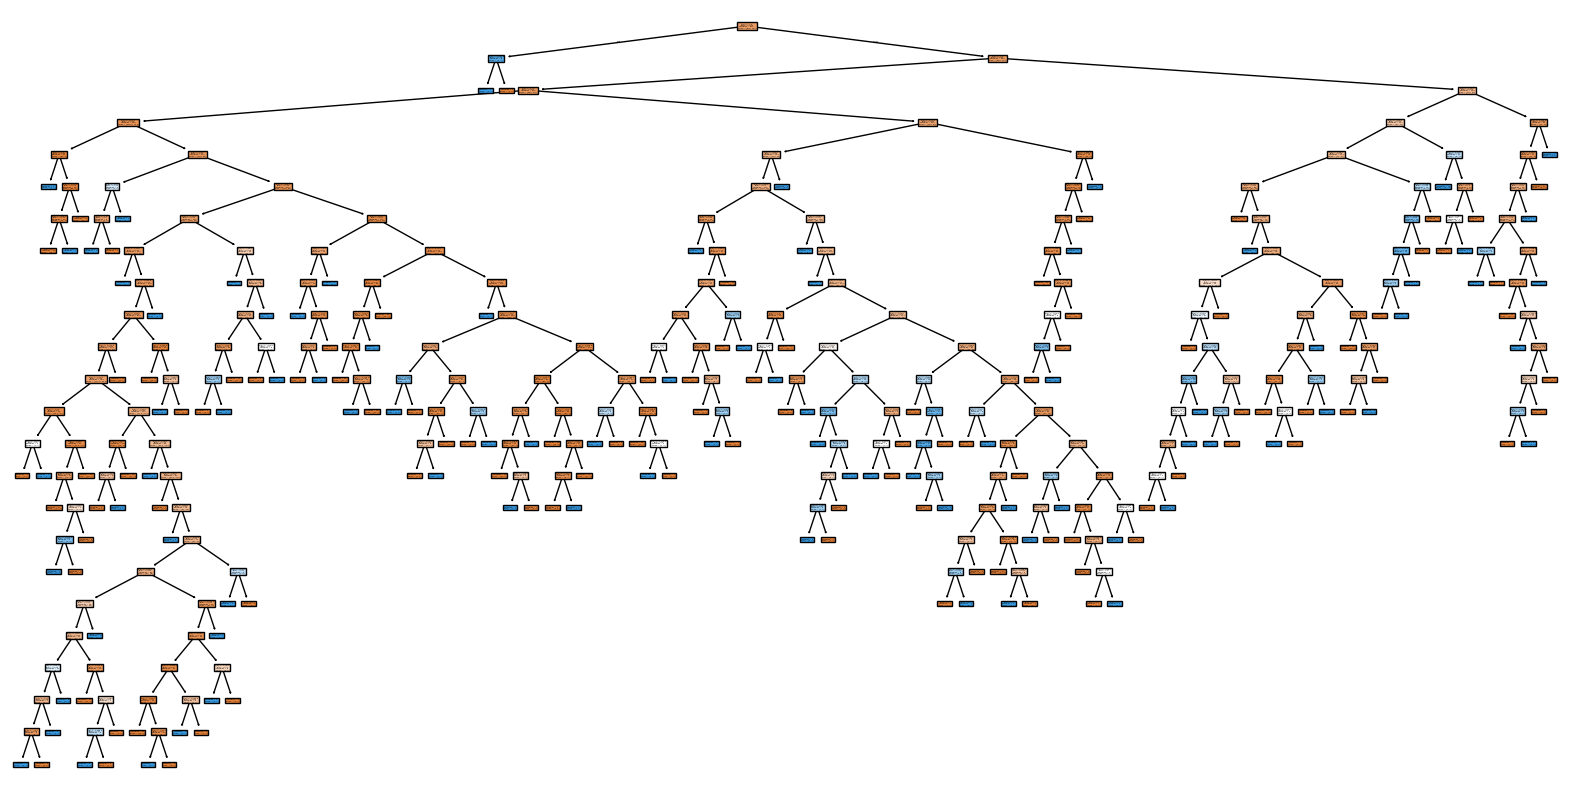

In [144]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()